In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('1.csv')

In [23]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df['sqrt_A'], autolag='AIC') 

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.189650e+00
p-value                        6.167173e-08
#Lags Used                     1.400000e+01
Number of Observations Used    1.620000e+02
Critical Value (1%)           -3.471374e+00
Critical Value (5%)           -2.879552e+00
Critical Value (10%)          -2.576373e+00
dtype: float64


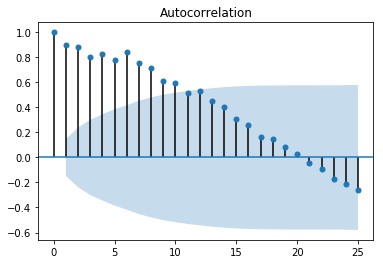

In [26]:
#from pandas.tools.plotting import autocorrelation_plot
#autocorrelation_plot(df['sqrt_A'])


from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = df['sqrt_A']
plot_acf(series,lags=25)
pyplot.show()


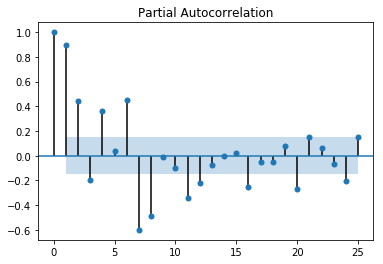

In [27]:
#from statsmodels.graphics.tsaplots import plot_pacf
#plot_pacf(df['sqrt_A'],lags=25)
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = df['sqrt_A']
plot_pacf(series, lags=25)
pyplot.show()

In [28]:
df1 = pd.to_datetime(df['Epoch_Time_of_Clock'])

df['Epoch_Time_of_Clock']=df1
df.Timestamp = pd.to_datetime(df['Epoch_Time_of_Clock'],format='%Y-%m-%d %H:%M:%S') 

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [29]:
b=df['sqrt_A']
b.index = df.Timestamp
b

Epoch_Time_of_Clock
2017-11-01 14:00:00    5153.670197
2017-11-01 16:00:00    5153.669188
2017-11-01 18:00:00    5153.669888
2017-11-01 20:00:00    5153.670305
2017-11-01 22:00:00    5153.673241
2017-11-02 00:00:00    5153.672241
2017-11-02 12:00:00    5153.672129
2017-11-02 14:00:00    5153.669369
2017-11-02 16:00:00    5153.668636
2017-11-02 18:00:00    5153.668608
2017-11-02 20:00:00    5153.669594
2017-11-02 22:00:00    5153.672066
2017-11-03 12:00:00    5153.673458
2017-11-03 14:00:00    5153.670349
2017-11-03 16:00:00    5153.669727
2017-11-03 18:00:00    5153.669182
2017-11-03 20:00:00    5153.670465
2017-11-03 22:00:00    5153.672173
2017-11-04 12:00:00    5153.675608
2017-11-04 14:00:00    5153.673035
2017-11-04 16:00:00    5153.672115
2017-11-04 18:00:00    5153.671932
2017-11-04 20:00:00    5153.672991
2017-11-04 22:00:00    5153.674004
2017-11-05 12:00:00    5153.677954
2017-11-05 14:00:00    5153.676699
2017-11-05 16:00:00    5153.675026
2017-11-05 18:00:00    5153.676235


In [30]:
from sklearn.model_selection import train_test_split

#train, test = train_test_split(b, test_size=0.25,random_state=1)
train = b.iloc[0:137]
test = b.iloc[137:177]

In [31]:
len(train)
len(test)
#train.dtypes

40

In [75]:
d1=train
#d1 = d1 - d1.shift(1)
print(d1.head(10))
d1 = d1 - d1.shift(1)
print(d1.head(10))

Epoch_Time_of_Clock
2017-11-01 14:00:00    5153.670197
2017-11-01 16:00:00    5153.669188
2017-11-01 18:00:00    5153.669888
2017-11-01 20:00:00    5153.670305
2017-11-01 22:00:00    5153.673241
2017-11-02 00:00:00    5153.672241
2017-11-02 12:00:00    5153.672129
2017-11-02 14:00:00    5153.669369
2017-11-02 16:00:00    5153.668636
2017-11-02 18:00:00    5153.668608
Name: sqrt_A, dtype: float64
Epoch_Time_of_Clock
2017-11-01 14:00:00         NaN
2017-11-01 16:00:00   -0.001009
2017-11-01 18:00:00    0.000700
2017-11-01 20:00:00    0.000418
2017-11-01 22:00:00    0.002935
2017-11-02 00:00:00   -0.000999
2017-11-02 12:00:00   -0.000113
2017-11-02 14:00:00   -0.002760
2017-11-02 16:00:00   -0.000732
2017-11-02 18:00:00   -0.000029
Name: sqrt_A, dtype: float64


/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


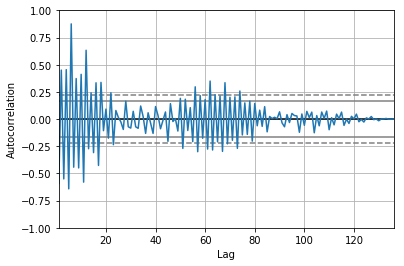

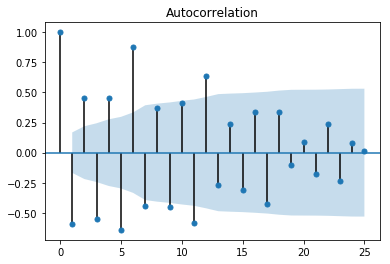

In [81]:
from pandas.tools.plotting import autocorrelation_plot
#autocorrelation_plot(train)
autocorrelation_plot(d1.dropna())
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
#series = train
series = d1.dropna()
plot_acf(series,lags=25)
pyplot.show()

/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


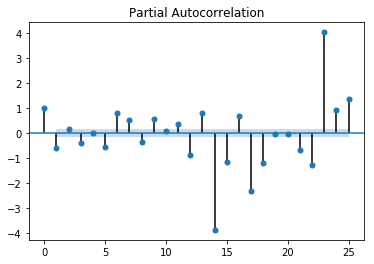

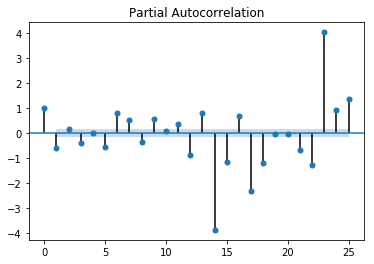

In [83]:
from statsmodels.graphics.tsaplots import plot_pacf
#plot_pacf(train,lags=25)
plot_pacf(d1.dropna(),lags=25)
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
#series = train
series = d1.dropna()
plot_pacf(series,lags=25)
pyplot.show()

/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.sqrt_A   No. Observations:                  136
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 680.309
Method:                       css-mle   S.D. of innovations              0.002
Date:                Wed, 20 Feb 2019   AIC                          -1352.618
Time:                        18:58:44   BIC                          -1340.967
Sample:                             1   HQIC                         -1347.884
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.686e-05   6.87e-05      1.264      0.208   -4.78e-05       0.000
ma.L1.D.sqrt_A    -0.5960      0.082     -7.307      0.000      -0.756      -0.436
ma.L2.D.sqrt_A     0.0860      0.057

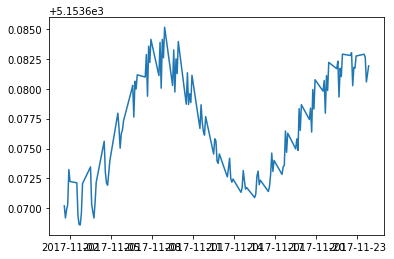

In [84]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(0,1,2))
results_AR = model.fit()
plt.plot(train)
print(results_AR.summary())

/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/shreyas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/shreyas/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which wil

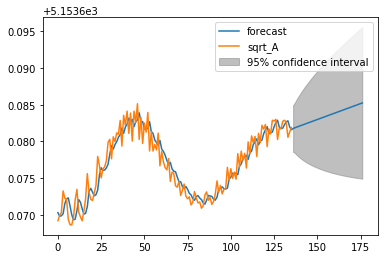

In [85]:
results_AR.plot_predict(1,177)
pr=results_AR.forecast(steps=40)
plt.show()

In [86]:
len(test)

40

/home/shreyas/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


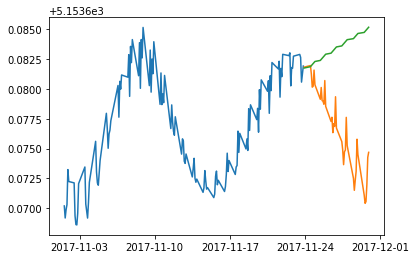

In [87]:

forecast = results_AR.forecast(steps=len(test))
forecast = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [88]:
diff=[]
e=0
for i in range(0,39):
    diff.append(test[i]-pr[0][i])
    e+=abs(test[i]-pr[0][i])
e=e/40
e


0.0066363618918558135

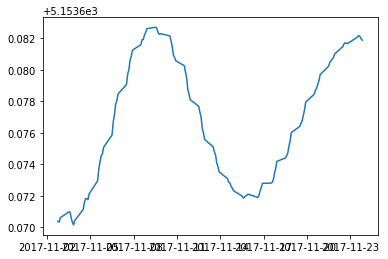

In [57]:
rm = train.rolling(window=10).mean()
plt.plot(rm)

In [ ]:
rm = df['sqrt_A'].rolling(window=5).mean()
plt.plot(rm)

In [32]:
#building the model

from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1308.012, BIC=-1302.186, Fit time=0.141 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1364.569, BIC=-1355.831, Fit time=0.058 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-1350.237, BIC=-1341.499, Fit time=0.112 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1365.746, BIC=-1354.096, Fit time=0.103 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-1381.681, BIC=-1364.205, Fit time=0.251 seconds
Fit ARIMA: order=(4, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-1379.737, BIC=-1359.348, Fit time=0.546 seconds
Fit ARIMA: order=(3, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-1383.251, BIC=-1368.688, Fit time=0.292 seconds
Fit ARIMA: order=(4, 1, 0) seasonal_order=(0, 0

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

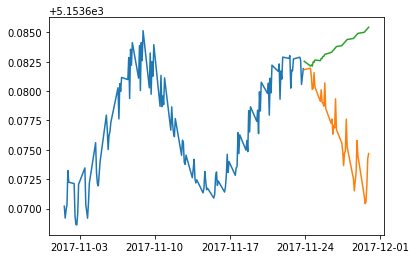

In [31]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()


In [86]:
for i in range(2,16):
    if(i!=4):
        str1=str(i)+".csv"
        print(str1)
        df = pd.read_csv(str1)
        #Perform Dickey-Fuller test:
        from statsmodels.tsa.stattools import adfuller

        print ('Results of Dickey-Fuller Test:')
        dftest = adfuller(df['sqrt_A'], autolag='AIC') 

        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value

        print(dfoutput)

2.csv
Results of Dickey-Fuller Test:
Test Statistic                  -2.964228
p-value                          0.038373
#Lags Used                      13.000000
Number of Observations Used    137.000000
Critical Value (1%)             -3.479007
Critical Value (5%)             -2.882878
Critical Value (10%)            -2.578149
dtype: float64
3.csv
Results of Dickey-Fuller Test:
Test Statistic                  -0.680012
p-value                          0.851859
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
5.csv
Results of Dickey-Fuller Test:
Test Statistic                  -1.343203
p-value                          0.609182
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%

In [87]:
for i in range(2,16):
    if(i!=4):
        str1=str(i)+".csv"
        print(str1)
        df = pd.read_csv(str1)
        #Perform Dickey-Fuller test:
        from statsmodels.tsa.stattools import adfuller

        print ('Results of Dickey-Fuller Test:')
        dftest = adfuller(df['M0'], autolag='AIC') 

        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value

        print(dfoutput)

2.csv
Results of Dickey-Fuller Test:
Test Statistic                  -0.860219
p-value                          0.800790
#Lags Used                      11.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64
3.csv
Results of Dickey-Fuller Test:
Test Statistic                  -1.474674
p-value                          0.546000
#Lags Used                      10.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64
5.csv
Results of Dickey-Fuller Test:
Test Statistic                  -2.055984
p-value                          0.262578
#Lags Used                       8.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%